# Assignment 1: Logistic regression for sentiment analysis on tweets

In this assignment, I performed different tasks regarding NLP

#### 1. Text Processing

#### 2. Feature Extraction

#### 3. Sentiment Classifier

#### 4. Training & evaluating the sentiment classifier


In [ ]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator

import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

import numpy as np                            # Python library for Numpy

In [2]:
# downloads sample twitter dataset. uncomment the line below if running on a local machine.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Talha\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [3]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [4]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


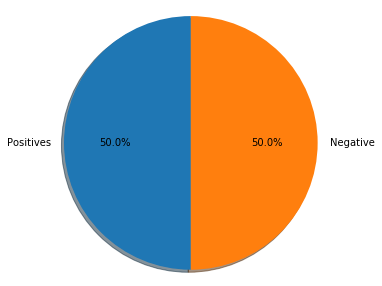

In [5]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()

In [6]:
# print positive in greeen
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

#FF The Best Twoofs to follow have a GR8 wkend :)
@allpawone
@Hungry_Hounds
@DDWalks
@HealthyHounds4U
@pawsforawalk
http://t.co/fIYPR3t2Ai
@swiftstruelove :( let me speak *struggles*


In [7]:
# Our selected sample. Complex enough to exemplify each step
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Talha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Split training and testing data 
### 80% training and 20% testing

In [13]:
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]
train_x = train_pos + train_neg 
test_x = test_pos + test_neg
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

# Text Processing

Text processing includes :
Tokenization : is the operation of splitting a sentence into a list of words.
Removing stop words : stop words refer to the frequent words occurring in a text without adding a semantic value to the text.
Removing punctuation : it refers to the marks like (!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~).
Stemming : is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words

In [14]:
def text_process(tweet):
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tokenizer = TweetTokenizer()
    tweet_tokenized = tokenizer.tokenize(tweet)
    stopwords_english = stopwords.words('english') 
    tweet_processsed=[word for word in tweet_tokenized 
    if word not  in stopwords_english and word not in       
    string.punctuation]
    stemmer = PorterStemmer() 
    tweet_after_stem=[]
    for word in tweet_processsed:
        word=stemmer.stem(word)
        tweet_after_stem.append(word)
    return tweet_after_stem

# Features extraction

Transforming tweets into vectors that can be fed into our logistic regression function. Working on binary classification which means classifying a tweet either positive or negative. So basically, we’d find some words more occurring in the list of positive tweets like happy, good. In the same way, we'd find some words more frequent than the others in the list of negative tweets.

So, in order to implement this, build the first dictionary containing the frequency of the words in the positive tweets, and the second dictionary will contain the frequency of the words in the negative tweets. Then, well combine the two dictionaries.

In [17]:
pos_words=[]
for tweet in all_positive_tweets:
    tweet=text_process(tweet)
    
    for word in tweet:
        
        pos_words.append(word)
freq_pos={}
for word in pos_words:
    if (word,1) not in freq_pos:
        freq_pos[(word,1)]=1
    else:
        freq_pos[(word,1)]=freq_pos[(word,1)]+1
neg_words=[]
for tweet in all_negative_tweets:
    tweet=text_process(tweet)
    
    for word in tweet:
        
        neg_words.append(word)
freq_neg={}
for word in neg_words:
    if (word,0) not in freq_neg:
        freq_neg[(word,0)]=1
    else:
        freq_neg[(word,0)]=freq_neg[(word,0)]+1
        
freqs_dict = dict(freq_pos)
freqs_dict.update(freq_neg)

In [19]:
print (freqs_dict)

{('followfriday', 1): 25, ('@france_int', 1): 1, ('@pkuchly57', 1): 1, ('@milipol_pari', 1): 1, ('top', 1): 32, ('engag', 1): 7, ('member', 1): 16, ('commun', 1): 33, ('week', 1): 83, (':)', 1): 3568, ('@lamb2ja', 1): 1, ('hey', 1): 76, ('jame', 1): 7, ('how', 1): 24, ('odd', 1): 2, (':/', 1): 5, ('pleas', 1): 97, ('call', 1): 37, ('contact', 1): 7, ('centr', 1): 2, ('02392441234', 1): 1, ('abl', 1): 8, ('assist', 1): 1, ('mani', 1): 33, ('thank', 1): 620, ('@despiteoffici', 1): 1, ('listen', 1): 16, ('last', 1): 47, ('night', 1): 68, ('As', 1): 5, ('you', 1): 123, ('bleed', 1): 2, ('amaz', 1): 51, ('track', 1): 5, ('when', 1): 14, ('scotland', 1): 2, ('@97side', 1): 1, ('congrat', 1): 21, ('yeaaaah', 1): 1, ('yippppi', 1): 1, ('accnt', 1): 2, ('verifi', 1): 2, ('rqst', 1): 1, ('succeed', 1): 1, ('got', 1): 69, ('blue', 1): 9, ('tick', 1): 1, ('mark', 1): 1, ('fb', 1): 1, ('profil', 1): 2, ('15', 1): 5, ('day', 1): 246, ('@bhaktisbant', 1): 17, ('@pallaviruhail', 1): 8, ('thi', 1): 41,

after building this dictionary, convert each tweet to a vector of 3 dimensions 

Each vector is a representation of a tweet. Combine those vector in one matrix holding all tweet’s features. As we have 10000 tweets, and each tweet is represented as vector of 3 dimensions, the shape of our matrix X would be (10000,3) :

In [22]:
def features_extraction(tweet, freqs_dict):
    word_l = text_process(tweet)
    x = np.zeros((1, 3))
    x[0,0] = 1 
    for word in word_l:
        try:
            x[0,1] += freqs_dict[(word,1)]
        except:
            x[0,1] += 0
        try: 
            x[0,2] += freqs_dict[(word,0.0)]
        except:
            x[0,2] += 0
    assert(x.shape == (1, 3))
    return x
X = np.zeros((len(train_x), 3))
    
for i in range(len(train_x)):
    
    X[i, :]= features_extraction(train_x[i], freqs_dict)

# Sentiment classifier

To build the sentiment classifier,
we have two options , wether use scikit-learn library for logisistice regression or to build a logistic regression classifier from scratch. In this assignment i build logistic regression classifier from scratch

The logistic or sigmoid function uses the features as input to calculate the probability of a tweet being labeled as positive, if the output is greater or equal 0.5, classify the tweet as positive. Otherwise, classify it as negative.

In [23]:
def sigmoid(x): 
    h = 1/(1+np.exp(-x))
    return h

def gradientDescent_algo(x, y, theta, alpha, num_iters):
    m = x.shape[0]
    for i in range(0, num_iters):
        z = np.dot(x,theta)
        h = sigmoid(z)
        J = -1/m*(np.dot(y.T,np.log(h))+np.dot((1-y).T,np.log(1-h)))
        theta = theta-(alpha/m)*np.dot(x.T,h-y)
    J = float(J)
    return J, theta

# Training & evaluating the sentiment classifier

After implementing gradient descent, now move to training in order to calculate the optimal weights theta :

In [24]:
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= features_extraction(train_x[i], freqs_dict)
Y = train_y
J, theta = gradientDescent_algo(X, Y, np.zeros((3, 1)), 1e-9, 1500)

It’s time for testing our sentiment classifier in order to evaluate how it performs on test_x:

In [25]:
def predict(tweet, freqs_dict, theta):
    x = features_extraction(tweet,freqs_dict)
    y_pred = sigmoid(np.dot(x,theta))
    return y_pred
def test_accuracy(test_x, test_y, freqs_dict, theta):
    y_hat = []
    for tweet in test_x:
        
        y_pred = predict(tweet, freqs_dict, theta)
        
        if y_pred > 0.5:
           
            y_hat.append(1)
        else:
            
            y_hat.append(0)
    m=len(y_hat)
    y_hat=np.array(y_hat)
    y_hat=y_hat.reshape(m)
    test_y=test_y.reshape(m)
    
    c=y_hat==test_y
    j=0
    for i in c:
        if i==True:
            j=j+1
    accuracy = j/m
    return accuracy
accuracy = test_accuracy(test_x, test_y, freqs_dict, theta)

In [29]:
print ("Model Accuracy: ",accuracy*100 ,"%")

Model Accuracy:  98.4 %
